### Let's check the rate of buses riding across Warsaw Center Railway Station to find out if night buses ride there more often than day buses.

In [1]:
import pandas as pd
from typing import Dict
from visualization.utils import calculate_distance
from tqdm import tqdm

In [2]:
RADIUS = 0.2
WARSAW_CENTER_STATION = (52.22913267831352, 21.003211049757706)

def in_center(lat: float, lon: float) -> bool:
    return calculate_distance((lat, lon), (WARSAW_CENTER_STATION[0], WARSAW_CENTER_STATION[1])) < RADIUS

In [3]:
def get_vehicles_in_center(df: pd.DataFrame) -> pd.DataFrame:
    all_positions = df[df.apply(lambda x: in_center(x['Lat'], x['Lon']), axis=1)]
    return all_positions['VehicleNumber'].unique()

In [4]:
def filter_idle_vehicles(df: pd.DataFrame) -> pd.DataFrame:
    for vehicle in df['VehicleNumber'].unique():
        vehicle_positions = df[df['VehicleNumber'] == vehicle]
        if calculate_distance((vehicle_positions['Lat'].max(), vehicle_positions['Lon'].max()), (vehicle_positions['Lat'].min(), vehicle_positions['Lon'].min())) < 0.1:
            df = df[df['VehicleNumber'] != vehicle]
    return df

In [5]:
hours = [i for i in range(2, 6)] + [i for i in range(15, 19)]

In [6]:
buses_location: Dict[int, pd.DataFrame] = {}
buses_in_center: Dict[int, int] = {}

for hour in tqdm(hours):
    buses_location[hour] = pd.read_json(f'data/buses-{hour}.json')
    buses_location[hour] = filter_idle_vehicles(buses_location[hour])
    buses_in_center[hour] = len(get_vehicles_in_center(buses_location[hour]))


100%|██████████| 8/8 [04:12<00:00, 31.50s/it]


In [7]:
buses_in_center = {k: v / len(buses_location[k]['VehicleNumber'].unique()) for k, v in buses_in_center.items()}

/home/szymon/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


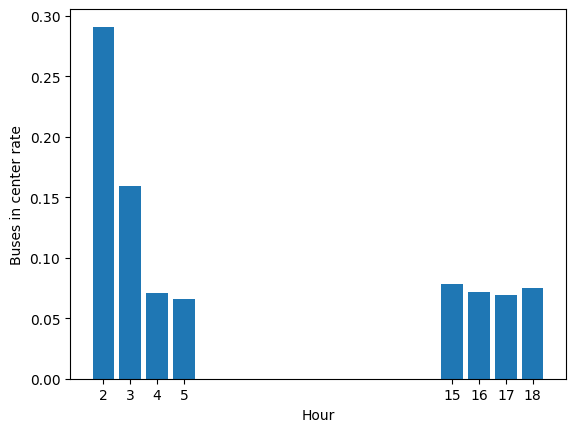

In [8]:
import matplotlib.pyplot as plt

plt.bar(buses_in_center.keys(), buses_in_center.values())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Buses in center rate')
plt.show()